# Compare two root files describing the jet constituent observables used for tagging

You can retrieve the jet constituent observables to a root file using the steering file `writeJetConstObs.py`. You can find out how to submit large jobs on condor in the `/extras/submit_to_condor` folder. 
 

In [1]:
import uproot 
import numpy as np
import matplotlib.pyplot as plt

from helper_jetobs import *

%load_ext autoreload
%autoreload 2

In [2]:
# change the paths here to use your own files 

path_1 = "/eos/experiment/fcc/ee/datasets/CLD_fullsim_tagging_debug_tracks/with_fixesPV/Hcc_0.root" #Hxx_0.root # full sim from key4hep
#path_2 = "/eos/experiment/fcc/ee/datasets/CLD_fullsim_tagging_input/Hcc_600.root" #Hdd_400.root "#Huu_200.root "#Hcc_600.root" #Hss_800.root" #Hbb_0.root # full sim from my own python script

path_2 = "/eos/experiment/fcc/ee/jet_flavour_tagging/winter2023/fastsim_2mio_total_SaraTagging/CLD/evaluation/Hcc.root"

In [3]:
file_1 = uproot.open(path_1)
tree_1 = file_1["JetConstituentObservables;1"]

file_2 = uproot.open(path_2)
tree_2 = file_2["tree;1"]

# adapt the size of the data you want to load here
df_1 = tree_1.arrays(library="np", entry_start=0, entry_stop=30000) 
df_2 = tree_2.arrays(library="np", entry_start=0, entry_stop=30000)

These are the keys from key4hep root file: 

In [4]:
df_1.keys()

dict_keys(['pfcand_erel_log', 'pfcand_thetarel', 'pfcand_phirel', 'pfcand_e', 'pfcand_p', 'pfcand_type', 'pfcand_charge', 'pfcand_isEl', 'pfcand_isMu', 'pfcand_isGamma', 'pfcand_isChargedHad', 'pfcand_isNeutralHad', 'pfcand_dndx', 'pfcand_tof', 'pfcand_cov_omegaomega', 'pfcand_cov_tanLambdatanLambda', 'pfcand_cov_phiphi', 'pfcand_cov_d0d0', 'pfcand_cov_z0z0', 'pfcand_cov_d0z0', 'pfcand_cov_phid0', 'pfcand_cov_tanLambdaz0', 'pfcand_cov_d0omega', 'pfcand_cov_d0tanLambda', 'pfcand_cov_phiomega', 'pfcand_cov_phiz0', 'pfcand_cov_phitanLambda', 'pfcand_cov_omegaz0', 'pfcand_cov_omegatanLambda', 'pfcand_d0', 'pfcand_z0', 'pfcand_Sip2dVal', 'pfcand_Sip2dSig', 'pfcand_Sip3dVal', 'pfcand_Sip3dSig', 'pfcand_JetDistVal', 'pfcand_JetDistSig', 'jet_PV_x', 'jet_PV_y', 'jet_PV_z', 'jet_PV_id', 'jet_MCPV_x', 'jet_MCPV_y', 'jet_MCPV_z'])

(I need to convert my old keys into the new convention, ignore this part)

In [5]:
key_map = { 
    "pfcand_erel_log": "pfcand_erel_log",
    "pfcand_thetarel": "pfcand_thetarel",
    "pfcand_phirel": "pfcand_phirel",
    "pfcand_dptdpt": "pfcand_cov_omegaomega",
    "pfcand_detadeta": "pfcand_cov_tanLambdatanLambda",
    "pfcand_dphidphi": "pfcand_cov_phiphi",
    "pfcand_dxydxy": "pfcand_cov_d0d0",
    "pfcand_dzdz": "pfcand_cov_z0z0",
    "pfcand_dxydz": "pfcand_cov_d0z0",
    "pfcand_dphidxy": "pfcand_cov_phid0",
    "pfcand_dlambdadz": "pfcand_cov_tanLambdaz0",
    "pfcand_dxyc": "pfcand_cov_d0omega",
    "pfcand_dxyctgtheta": "pfcand_cov_d0tanLambda",
    "pfcand_phic": "pfcand_cov_phiomega",
    "pfcand_phidz": "pfcand_cov_phiz0",
    "pfcand_phictgtheta": "pfcand_cov_phitanLambda",
    "pfcand_cdz": "pfcand_cov_omegaz0",
    "pfcand_cctgtheta": "pfcand_cov_omegatanLambda",
    "pfcand_dxy": "pfcand_d0",
    "pfcand_dz": "pfcand_z0",
    "pfcand_btagSip2dVal": "pfcand_Sip2dVal",
    "pfcand_btagSip2dSig": "pfcand_Sip2dSig",
    "pfcand_btagSip3dVal": "pfcand_Sip3dVal",
    "pfcand_btagSip3dSig": "pfcand_Sip3dSig",
    "pfcand_btagJetDistVal": "pfcand_JetDistVal",
    "pfcand_btagJetDistSig": "pfcand_JetDistSig",
    "pfcand_type": "pfcand_type",
    "pfcand_charge": "pfcand_charge",
    "pfcand_isEl": "pfcand_isEl",
    "pfcand_isMu": "pfcand_isMu",
    "pfcand_isGamma": "pfcand_isGamma",
    "pfcand_isChargedHad": "pfcand_isChargedHad",
    "pfcand_isNeutralHad": "pfcand_isNeutralHad",
    "pfcand_dndx": "pfcand_dndx",
    "pfcand_mtof": "pfcand_tof",
    "pfcand_e": "pfcand_e",
    "pfcand_p": "pfcand_p",
}


In [6]:
df_2 = {key_map.get(k): v for k, v in df_2.items() if key_map.get(k) is not None}

Plot variables:

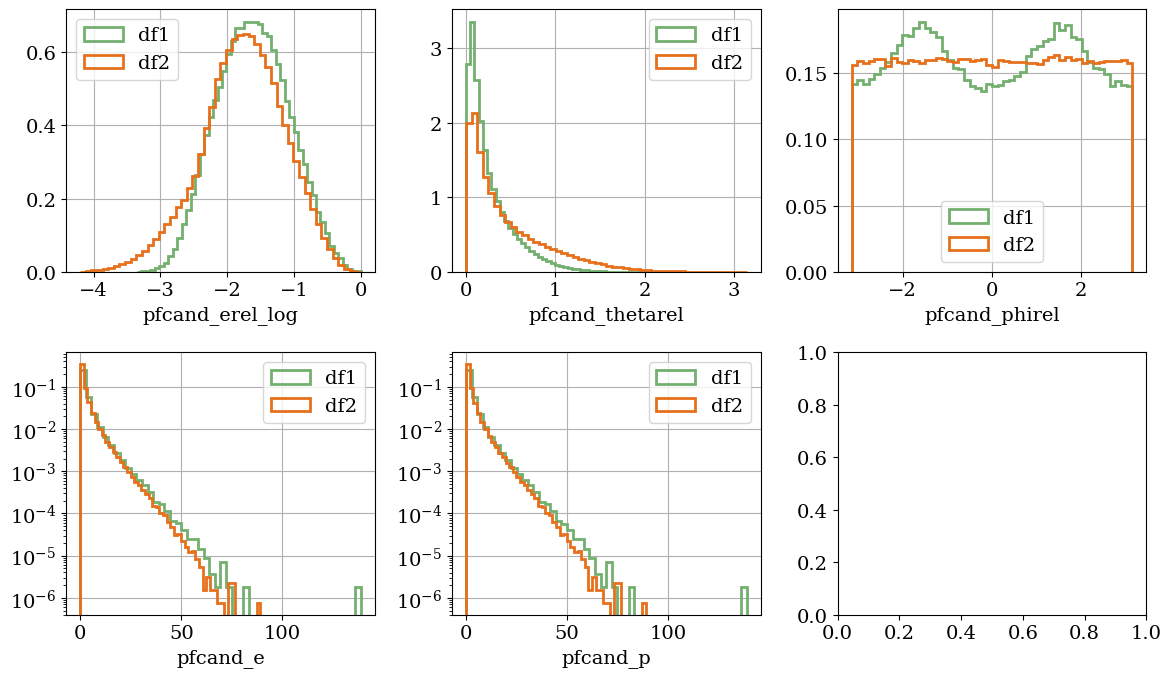

In [7]:
plot_kinematics(df_1, df_2)

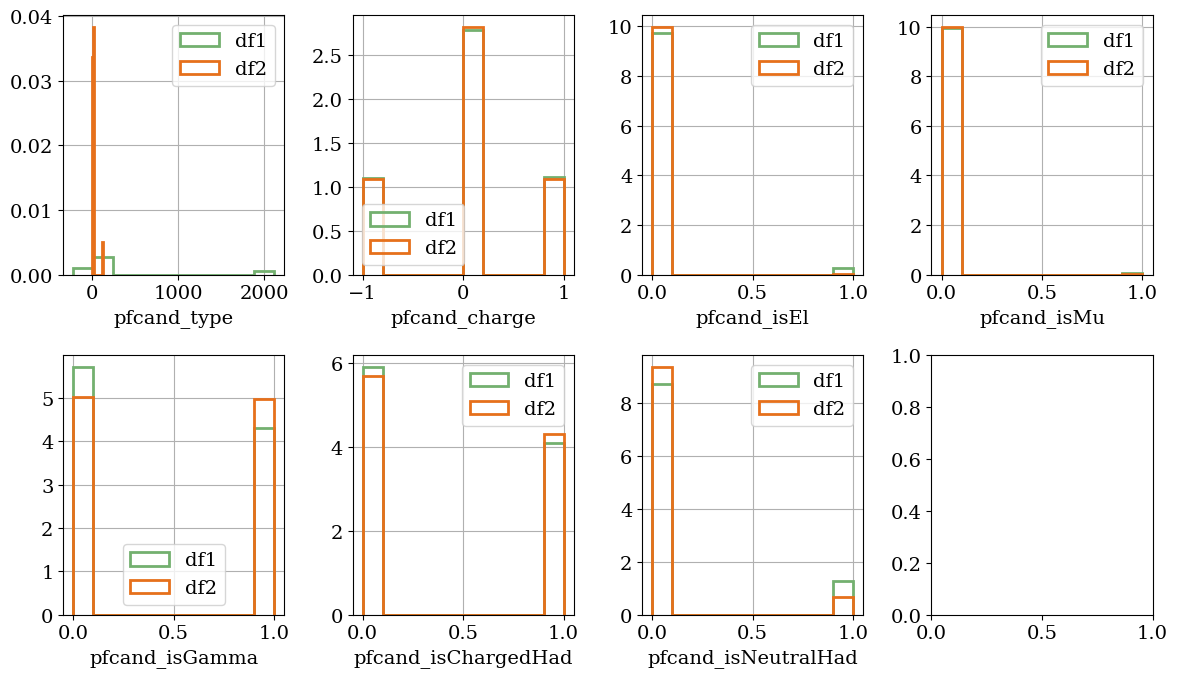

In [8]:
plot_pidflags(df_1, df_2)

We need to select the charged particles and find the highest energetic ones:

In [9]:
# these are lists because there might not always be 3 charged particles
index_charged_3E_1 = get_value_highest_energy_particle(df_1)
index_charged_3E_2 = get_value_highest_energy_particle(df_2, fastsim=True)

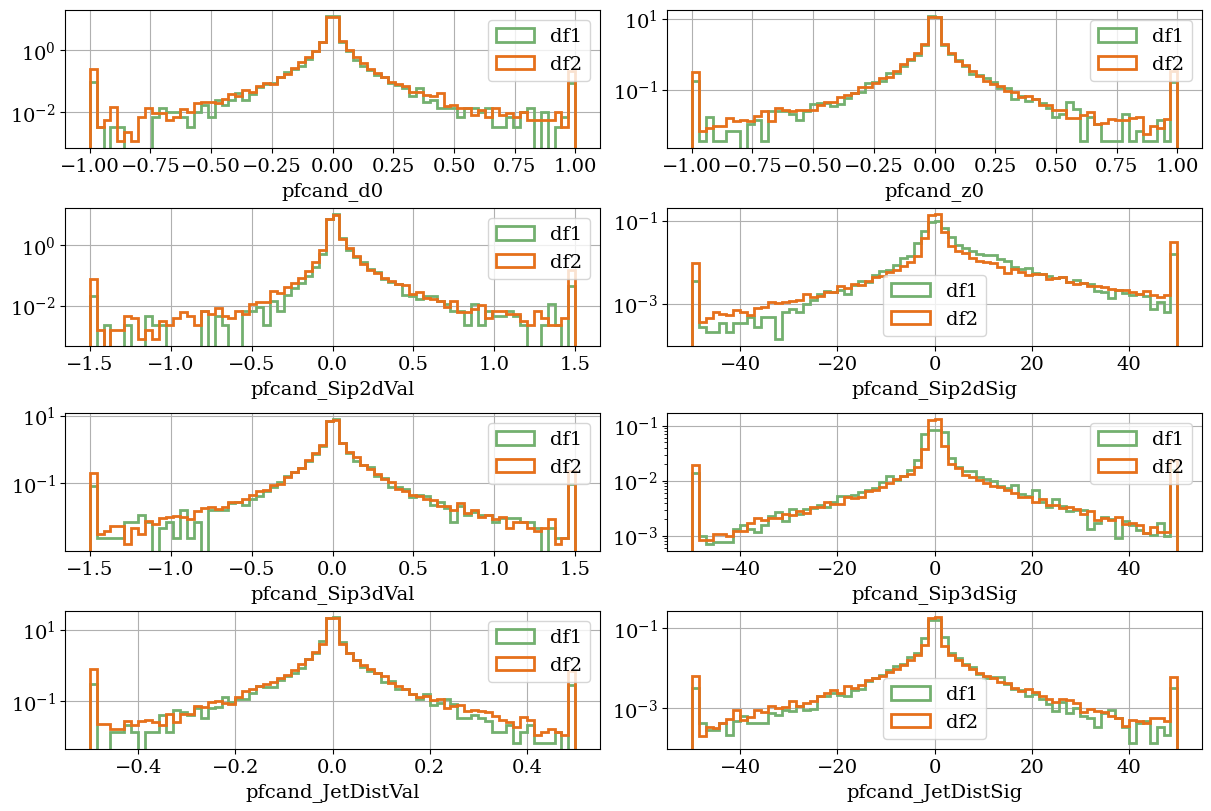

In [10]:
plot_IP(df_1, df_2, index_charged_3E_1, index_charged_3E_2)

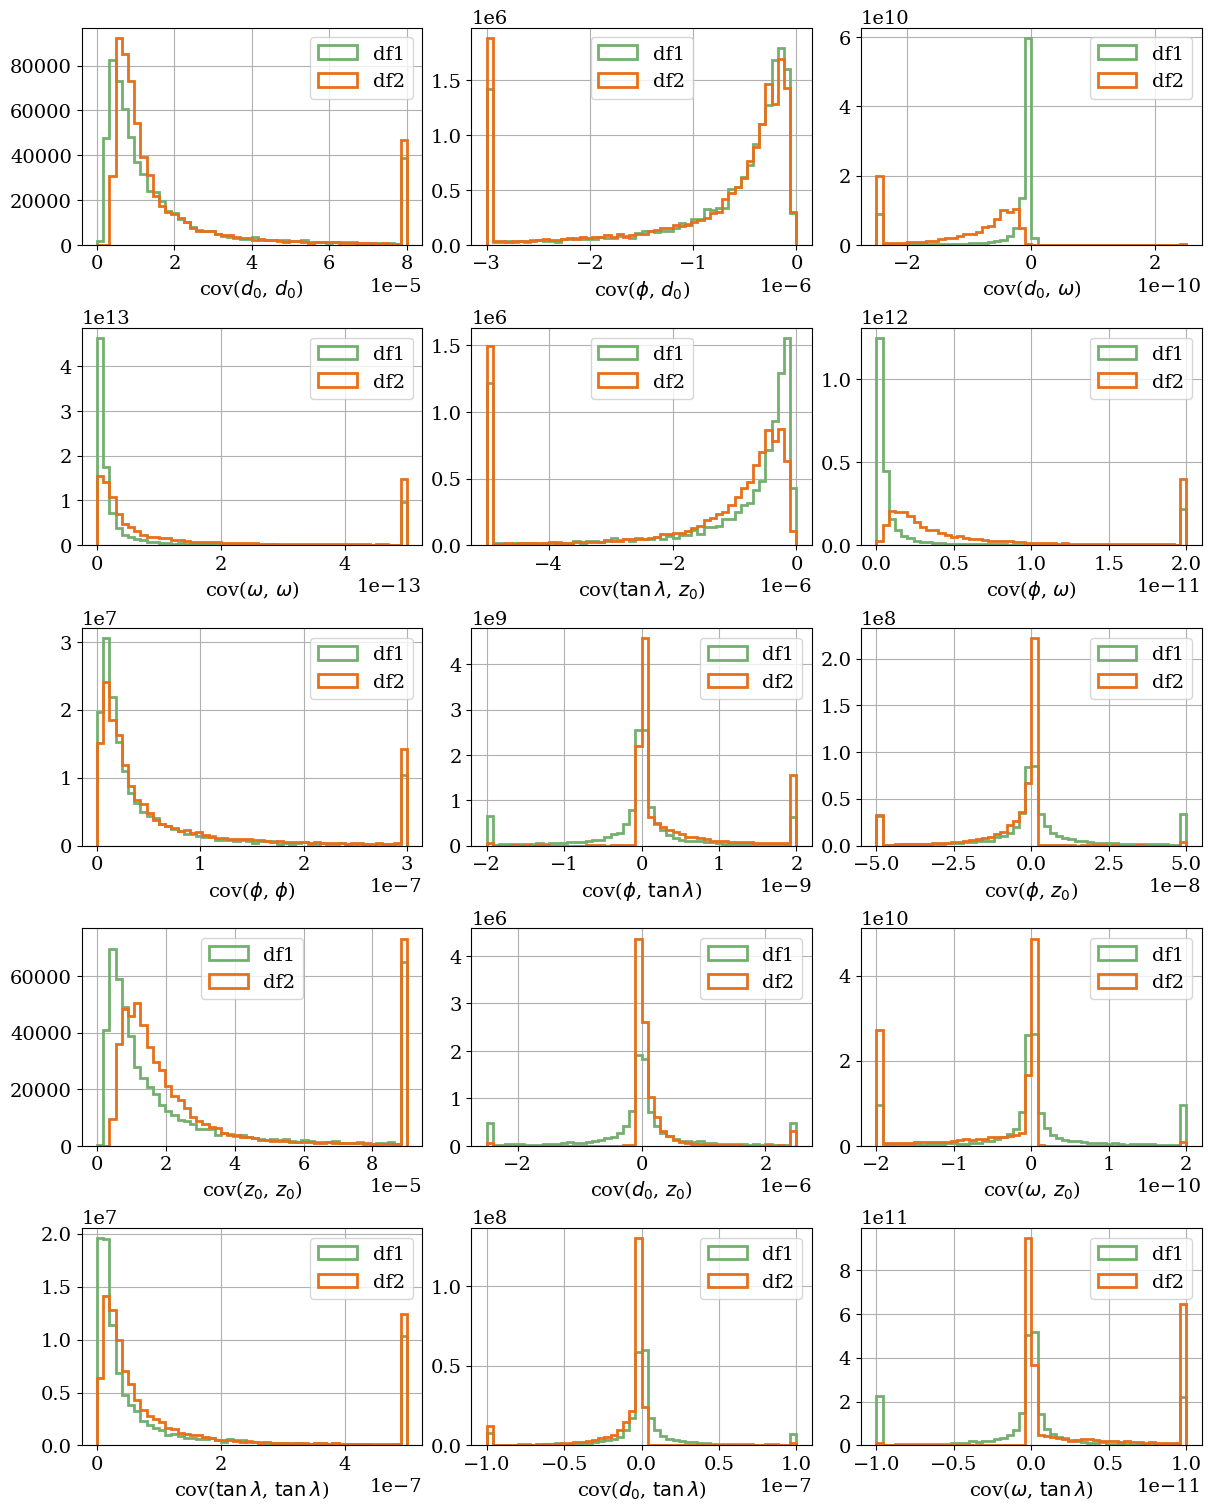

In [11]:
plot_cov_matrix(df_1, df_2, index_charged_3E_1, index_charged_3E_2)